# CNN 유튜브 정리 ( MNIST 구현 ) 

## 컨벌루션층의 과정

# https://wikidocs.net/64066

In [ ]:
## conv 출력(들어온 데이터에 가중치 즉 필터와 연산하고 바이어스를 더하는 것 ) -> relu 출력 -> pooling 출력 
## 이 과정이 반복됨

# 코드 
## conv : tf.nn.cov2d()
## relu : tf.nn.relu()


In [ ]:
# conv2d(input, filiter, strides, padding, ..)  

# 1. input : 컨벌루션 연산을 위한 입력 데이터이며, [batch, in_height, in_width, in_channel] 로 4개의 값을 갖는 tensor 로 구성되어있다 
#   ex) [100,28,28,1] : 100개의 배치로 묶는 28x28 크기의 흑백이미지이다

# 2. filter : 컨볼루션 연산에 적용할 필터로,  [filter_height, filter_width, in_channel, out_channel] 의 4개의 값을 갖는 tensor 로 구성됨
#   ex) [3,3,1,32]  : 필터 하나의 크기가 3x3 이고, 그러한 필터가 32개가 있고, 이러한 필터를 적용할 입력 채널은 1개에서 들어온다
#       ( 입력채널이 1이라는 것은 데이터가 들어오는 통로가 1개, 입력채널이 32개이면 32개의 통로를 통해서 들어온다 ) 
#         = ( 32 개의 필터를 적용할 입력데이터는 1개의 채널로 들어온다 )


# 3. strides :  필터를 이동시키는 간격 
#   ex) [1,1,1,1] : 컨볼루션을 하기위해서 1칸씩 필터를 이동


# 4. padding : same 이나 valid 의 값을 가진다 
#          (same 이라고 하면 입력값의 가로와 세로가 같은 값이 출력되도록 자동으로 0을 채워줌/ valid 는 패딩안하는것) 

In [ ]:
# 최대값을 뽑아주는 max_pool 을 보자!! (pooling)
# tf.nn.max_pool ( value, ksize, strides, padding )  >> 4개를 요구!!

#1. value: [batch, height, width, channels]  형식의 입력데이터로, 일반적으로 relu 를 통과한 출력결과를 지칭 

# 2. ksize : [1, height, width, 1] 로 표현한다 
# ex) [1,2,2,1] 이라면 2칸씩 이동하면서 출력결과 1개를 만들어낸다 . 즉 4개(2x2) 데이터 중에서 가장 큰 값 1개를 뽑아낸다
# ex) [1,3,3,1] 이라면 9개 (3x3) 데이터 중에서 가장 큰 값을 찾는다는 의미

# 3. strides : max pooling 을 위해 윈도우를 이동시키는 간격을 나타낸다.
# ex) [1,2,2,1] : max pooling 적용을 위해 2칸씩 이동한다

# 4. padding : max pooling 울 수행하기에 데이터가 부족한 경우 주변을 0등으로 채워주는 역할을 한다 
#  ex) max pooling 에 들어오는 입력데이터가 7x7 인데 데이터를 2개씩 묶어 최대값을 찾아내기에는 부족하다 ( 8x8 이여야한다 ) 
#  >> same 이면 8x8 이 되게 나머지부분을 0으로 채워준다 

## 완전연결층, 출력층 과정

In [ ]:
#2. 완전연결층 : 컨볼루션층에서 나오는 결과는 3차원 텐서값인데 그 출력값을 1차원 벡터로 평탄화한다

# 코드 : tf.reshape()


#3. 출력층 : 입력으로 들어오는 값( 완전연결층 결과값 ) 을 선형회귀를 취한다 -> 선형회귀의 출력값을 softmax 로 준다 
#           ( softmax 의 출력값은 확률을 나타내는 작업이라고 생각하자!! )

# 코드 : tf.nn.softmax()

## 실제코드

In [ ]:
## 노드와 연산을 정의하고 실현할 수 있는 실제 코드를 보자 

### 입력데이터와 정답데이터를 분리한다 

In [62]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

In [ ]:
# MNIST 데이터베이스 는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [64]:
mnist= input_data.read_data_sets("MNIST_data/", one_hot = True)  # 1. read_data_sets 이라는 매서드를 통해서 mnist 데이터를 객체형태로 저장
                                                                  # 2. "MNIST_data/" : 저장되는 디렉터리
                                                                  # 3. 정답데이터는 one_hot encoding 형태로 저장된다 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [70]:
# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)


 55000 10000 5000


In [71]:
print("train image shape = ", np.shape(mnist.train.images)) #>> 55000개의 train data 가 있다. 784개의 픽셀을 갖는 이미지를 가지고 있다 
print("train label shape = ", np.shape(mnist.train.labels))  # >> one hot encoding 방식으로 저장된 label 을 가지고 있다 
print("test image shape = ", np.shape(mnist.test.images))  #>> 10000 개의 test  data 가 있다.
print("test label shape = ", np.shape(mnist.test.labels))

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


### 입력데이터와 정답데이터를 저장하는 placeholder 와 hyperparameter 확인

In [74]:
#학습을 위해 사용하는 hyperparameter

learning_rate = 0.001  # 학습율
epochs = 30            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수
                   # batch size란 'sample데이터 중 한번에 네트워크에 넘겨주는 데이터의 수를 말한다. batch는 mini batch라고도 불린다'

In [77]:
# 입력과 정답을 위한 플레이스홀더 노드 정의
# 각각은 feed_dict 으로 주어질 것이다
X= tf.placeholder(tf.float32,[None, 784]) 

T = tf.placeholder(tf.float32, [None,10])


# 컨벌루션 연산을 진행하기 위해서 입력데이터를 reshape 을 시켜준다 
# 실제로 원래데이터는 784개의 픽셀 값을 가지고 있는 MNIST 데이터이지만 conv2d 를 쓰기 위해서
# 28x28x1 차원을 갖도록 reshape 한다!!
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (흑백이미지이다)  -1은 배치사이즈 
 # 컬러로 하고싶으면 -1, 28, 28,3 이라고 하기 

### 첫번째 컨벌루션층

In [80]:
F2 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))  #>> 3x3 의 32개 필터 ( 입력데이터가 들어오는 통로는 1개 ) 
b2 = tf.Variable(tf.constant(0.1, shape=[32])) # >> 필터가 32개니까 bias 도 32개 (초기값은 0.1 로 지정)

In [ ]:
# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, F2, strides=[1, 1, 1, 1], padding='SAME')


# relu
Z2 = tf.nn.relu(C2+b2)


# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
17분까지 들었음

In [ ]:
# 웹앱,, >> 

In [10]:
# convolution ( 적분 ) 

## 필터를 랜덤으로 주게되면 컴퓨터가 학습을 한다. (큰 필터는 큰 특징을 찾아내고, 작은 필터는 작은 특징을 찾아낸다) >> 이를 통해서 주변값을 고려하게 된다
## 필터에 의해서 사이즈 문제가 발생한다
#  ex) 100x100 인데 필터 7x7 을 적용하면 94x94 가 나온다 ( valid option 일때)
#  ex) 100x100 인데 필터 7x7 을 적용하면 100x100 이 나온다 ( same 옵션이면 주변을 채운다=패딩 ) >>> 패딩을 하는 이유 : 주변의 특징값도 고려하기 위해서!!!

# filter갯수에 따라 channel수가 결정되는데 (=여러장의 이미지가 추출된다)    (이때 channel 은 color 값이 아니다)
# 다양한 특징을 추출하기 위해서 여러장의 필터를 적용한다 
# 여러장의 필터 적용하면 하나의 이미지에서 여러이미지가 나온다 



# CNN은 object detection(어디에 object 가 있는지)  / 분류(ex. 고양이 인지 개인지 분류)등에 쓰인다
# CNN 요새는 텍스트 마이닝에도 쓰인다 


In [ ]:
# fooling 즉 사이즈 줄이는 것은 별도로 명령어를 진행한다

# 컨볼루션과 풀링이 계속반복해서 만들어진 것을 나중에는 application 이라고 부른다

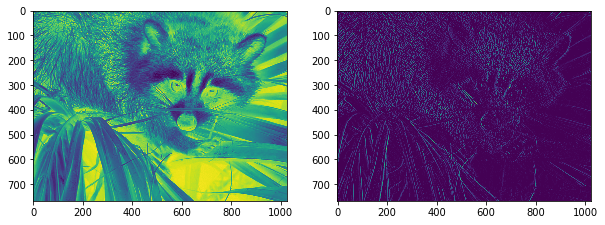

In [11]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage  
import scipy.misc  # misc : 사진같은것들을 모아둔 패키지임(기타를 모아둔것) 

img=255 - sp.misc.face(gray=True).astype(float)  # face 라는 이미지를 만들어뒀다.  (255를 뺏으니 반전됨)  흑백이면 0~255까지임 
# edge detection filiter = 경계선 검출

k=np.zeros((2,2))  # 2x2 행렬에 0으로 가득참

k[:,0] = 1; k[:,1]=-1  # 이것때문에
# 1 -1
# 1 -1 으로 바뀌게 된다

img2 = np.maximum(0, sp.ndimage.filters.convolve(img,k))  # convolve 이미지에서 필터, 정보통신 무선신호 복원 

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False) #>> 격자(grid) 못나오게한다 
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

# 두번쨰 그림은 경계션값만 나타난다

2 427 640 3


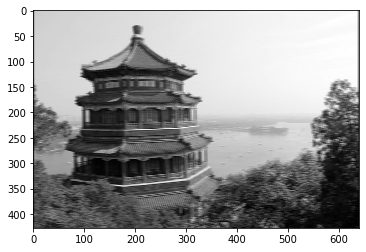

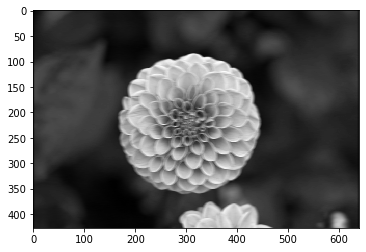

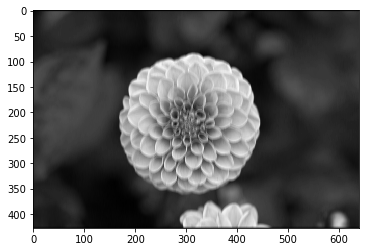

(2, 427, 640, 2)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
china= load_sample_image('china.jpg')  # 자동4차원
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)

batch_size, height, width, channels = dataset.shape   # batch_size = 장수, channel : 칼라수
print(batch_size, height, width, channels) #>>> 2장이다, 427은 행(높이), 640은 열 (가로) , 채널은 3(칼라가3개라는거니까 RGB 로 들어왔다는 뜻!!) 
                                                                             # 컬러는 숫자이다 

# 0~1은 부동소숫점이미지,  0~255도 있다   ( 나중에 이미지 정규화 해야한다. 앞에서 배웠음) )

filters = np.zeros(shape=(7,7, channels,2), dtype=np.float32)  # 7x7 의 행렬이 만들어지고 전부0으로 꽉참>>> 끝이2이다=필터가 2개가 만들어짐
filters[:,3,:,0]=1        # 채널을 그대로쓰는건 색이 3개니까 각각 들어온다
filters[3,:,:,1]=1  

# 어제는 70 x120 을 reshape 한것은 차수를 일치하려고 앞에 1을 붙였다.  (1이라는것 = china 한장이라는 의미)////// 뒤에 1은 흑백인듯?
# 여기서는 shape=(None, height, width, channels) >> none 이니까 >> 그냥 china, flower 2장 다 읽는다 

##### 다른 예제도 공부해보자 . 


          # None 이라는 것은 몇 장이 들어올지 모른다는 것!!!!! 근데 위에 2장이니까 여기서 2장이라는것을 알수 있다 
    
X=tf.placeholder(tf.float32, shape=(None, height, width, channels))  #여기서 channel 은 칼라값
##### 이미지 포맷은 결정되어있다 (위와 같이 4D 텐서 형태로 들어와야함!!!!) , 4개가 들어와야한다는것

convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding='SAME')
# 위에서 채널은 3이였음. 즉 칼라였는데 convolution 연산실행하니까(필터가2개임) >>> =즉 2d로 x와 필터 계싼을 했더니 >>칼라값은 단색으로 출력이 됨 


# 지금까지 그라프를 정의했다  >> 그라프를 정의했다는것은 노드와 엣지를 통해서 정의했다는 것이다 


with tf.Session() as sess:
    output= sess.run(convolution, feed_dict={X: dataset})  # 29일에 배운 output 과 다른형태지만같음)
    
plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0],cmap='gray')
plt.show()
type(output)
print(output.shape)  #스트라이드가 1일때  2,427,640,2   ( 맨뒤가 2이다 = 필터가 2개니까  ) 앞에2는 2장이 들어왔다는 것 같음(알아보자)

In [4]:
#  convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME') 로 해보자 , stride 값 바꾸기,  (앞뒤 11은 무조건 해야하는것)
### 427, 213.5 인데 반올림해서 427,214 가 나온다 ( 반으로 줄어드는 것을 확인 할 수 있다 ) 


# convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding='VALID')  로 바꿔보자 
# >>> 421x 634 가 나온다 .

# cmap = 'Accent' 해보기   >> 필터때문에 흑백이 나오는것이 아니다 ( 컬러랑 필터수 노상관) , 컬러변화는 cmap 인듯

In [5]:
# Q : output 으로 나온 이미지를 찍어봐라(4장이다) 

In [13]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis('off')

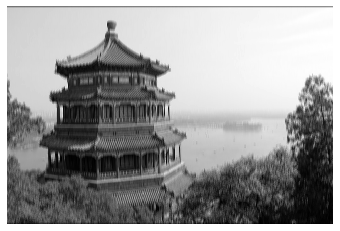

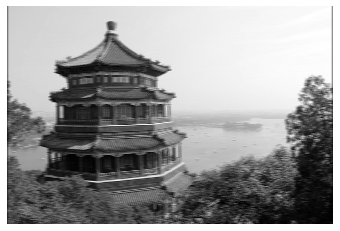

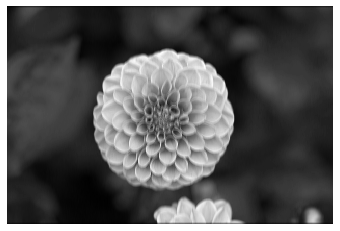

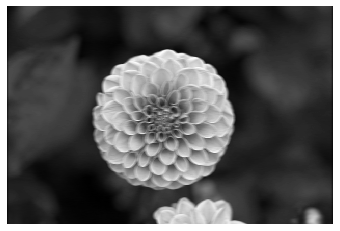

In [7]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :,:, feature_map_index])
        plt.show()

In [8]:
#max_pool 추가해보자 

2 427 640 3


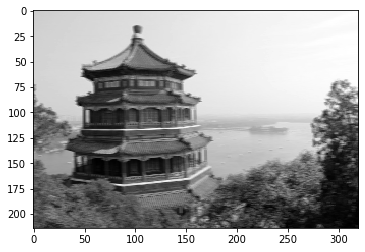

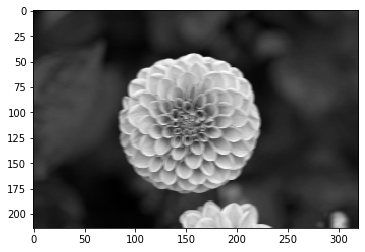

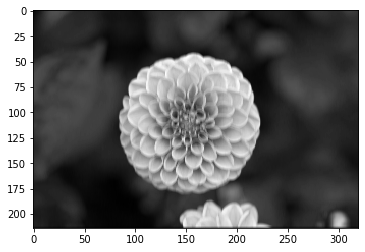

(2, 214, 320, 2)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
china= load_sample_image('china.jpg')  
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape  
print(batch_size, height, width, channels) 
filters = np.zeros(shape=(7,7, channels,2), dtype=np.float32)  
filters[:,3,:,0]=1       
filters[3,:,:,1]=1  
X=tf.placeholder(tf.float32, shape=(None, height, width, channels))  
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding='SAME')

###max_pool 은 컨볼루션으로 나온 결과를 줄여준다 ,  (사이즈 감소 ) 

max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
                                    # ksize >>> 2x2 를 하나로 줄여준다 
                                      # strides>> 2x2로 ksize 랑 같아야 pooling 이 진행된다  (즉 풀링할때는 ksize 와 strides 를 같게!!)
                                     # 커널사이즈와 스트라이드 같아야함 ( 건너뛰기랑 줄이는 사이즈가 같아야한다는것!!!)
                                  # strides=[1,1,1,1]  로 해봐서 비교해봐라 
            
        
with tf.Session() as sess:
    output= sess.run(max_pool, feed_dict={X: dataset})  # 29일에 배운 output 과 다른형태지만같음)
    
plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0],cmap='gray')
plt.show()
type(output)
print(output.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


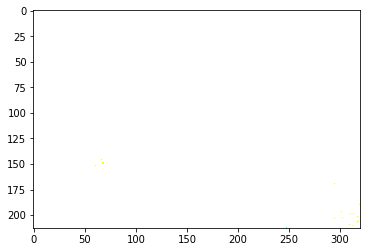

In [10]:
# 맥스풀링만 진행해보자
# max_pooling 된 결과를 이미지로 출력해봐라
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0])
plt.show() # 아까는 이렇게 했을때 출력이 됐는데 이건 안됨!! >> conv2d 와 poooling 의 차이이다
# conv2d 는 채널을 1개로 생성한다
# 풀링은 크기를 줄일뿐 채널을 원래 그대로 남겨둔다 >>> 따라서 unsinged int 형으로 바꿔야한다 (아래참고)
# 왜 unsinged int 형인가?  이건 양수형만 존재하므로 !  

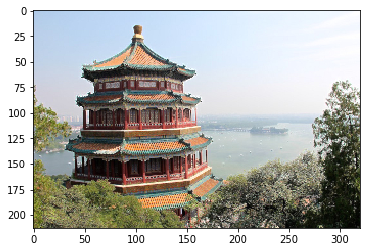

In [15]:
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8))   #채널을 그대로두기때문에 컬러로 출력이 된다 (원본데이터에 풀링만 진행했기때문에 칼러는 그대로있다)
plt.show()   

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


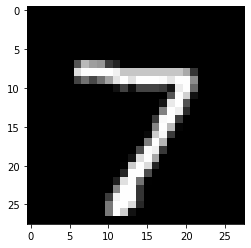

In [16]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)  # mnist  에 데이터를 받았다
first_image = mnist.test.images[0] # 이미지 0번에 있는 놈을 받았다   >> 0 번째에 있는 것을 가져온것 (다른숫자도 넣어봐라)
pixels = first_image.reshape((28,28))  # 28x28 로 reshape 했다
plt.imshow(pixels, cmap='gray') # gray 책으로 찍었음
plt.show()


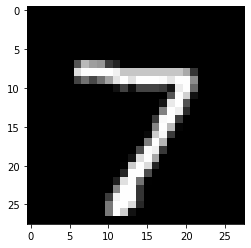

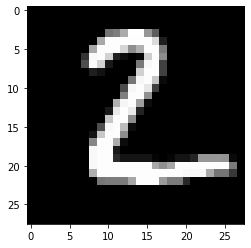

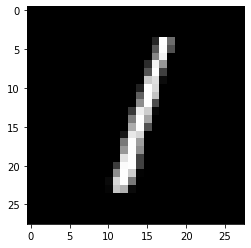

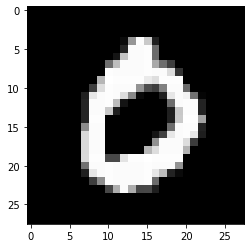

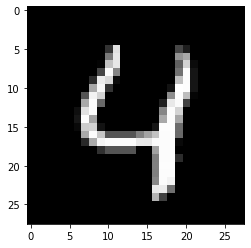

In [17]:

# 5장을 출력해봐라 

for i in range(5):
    first_image = mnist.test.images[i]
    pixels=first_image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    


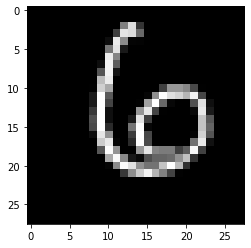

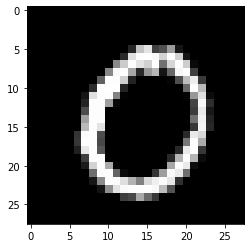

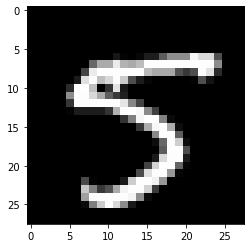

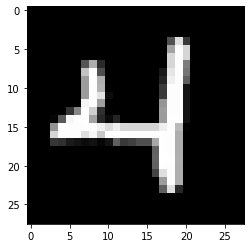

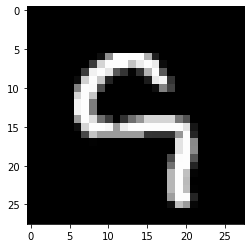

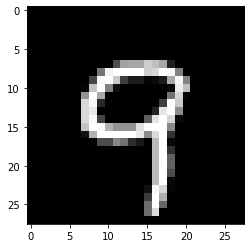

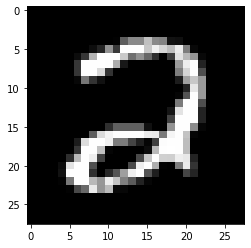

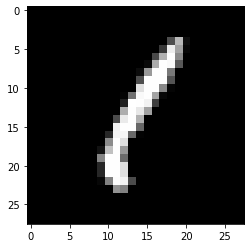

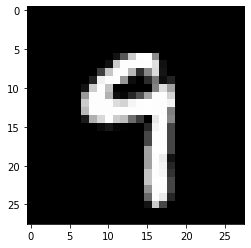

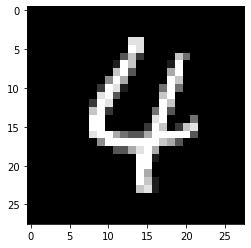

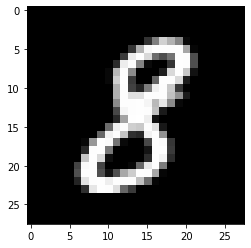

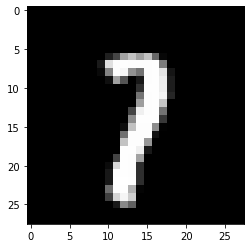

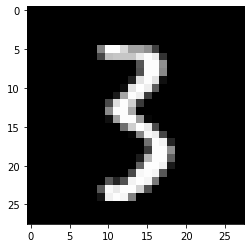

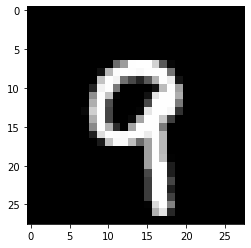

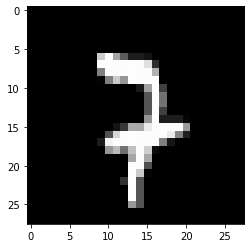

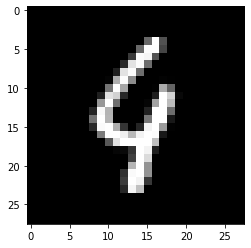

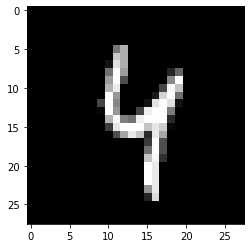

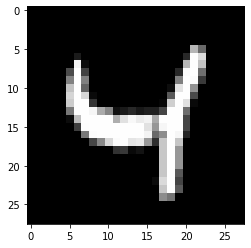

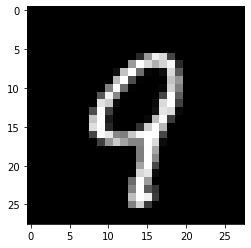

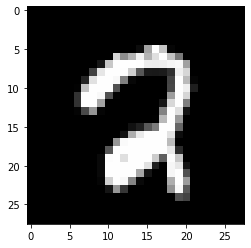

IndexError: index 20 is out of bounds for axis 0 with size 20

In [41]:
#   선생님이 하신것 
first_image = mnist.test.images[0:5]   # 784,784,784,..
fist_image = np.array(first_image, dtype='float')
for i in range(5):
    pixels = first_image[i].reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()


In [49]:
learning_rate = 0.001  # 이건 optimizer 에서 사용한다
num_steps= 500          # 이건 epoch 를 말한다 
batch_size = 128       # 이건 미니배치사이즈이다(mini batch size)
display_step = 10      #  이건 시각화를 위해서

num_input = 784  # 이미지가 28x28 이고  이걸 784 로 한걸 보니 >>> fully_connected 됐다라는 것을 알수있다 ( fully_connected = 사각형이미지가 한줄로 만들어졌다 ) 
                # >>>변수의 개수가 784 라고 말할 수 있다 
num_classes = 10  # 10개 인걸보니 one_hot encoding 되었다는 것을 알수있다 
dropout=0.75 # 과적합을 방지하기 위해서 임의적으로 25% 계산을 안한다 ( 75만 남기고 25는 버린다 )  , 25를 계산안해도 딥러닝은 잘돌아간다 
             # >>> 컴퓨터가 알아서 random 으로 dropout 시킨다 ( 임의적으로 진행함 )
    
    
                                          # name 을 지정 하면 나중에 편하다 (나중에 접근하기 편리)
X = tf.placeholder(tf.float32, [None, num_input], name='input') # placeholder 는 데이터가 저런 식으로 들어온다는 것이고 none 은 생략된것이고, num_input 은 784 >>> 훈련데이터가 들어온다
Y = tf.placeholder(tf.float32, [None, num_classes], name='output') #>>> 종속변수를 받겠다 
keep_prob = tf.placeholder(tf.float32, name='keep')## 이것도 나중에 dropout 을 받기위해서 만들어둔다 

In [50]:
# 1번 이상 반복되면 무조건 함수화하자!!

def conv2d(x, W, b, strides = 1): # 매개변수를 엑스데이터 가중치 바이어스를 받는다. (convolution 에 필요한 데이터를 받고 있음)
    x= tf.nn.conv2d(x, W, strides=[1,strides, strides, 1], padding='SAME') # conv2d 를 호출한다 ( 여기서 가중치는 필터를 말한다!!)
    x= tf.nn.bias_add(x,b)# conv2d 한 데이터에 bias 를 더해준다   
    return tf.nn.relu(x) # 그러고 나서 relu 를 적용해준다 !! 
                        # activation function 은 마지막에 1번만 호출한다고 배웠다 ( 이놈을 이용해서 회귀인지, 분류인지를 결정한다 ) 
                       # 그런데, multi -layer 에서 xor 문제를 해결하려면 activation function 으로 비선형으로 문제를 푼다고도 배웠다 
                       # 그리고 CNN 은 deep 할 수록 결과가 좋다!! 
  

  #     return tf.nn.relu(x) >>>>    # relu 를 달았다 >> activation function 을 적용했기때문에  비선형으로 mapping 됨!! 
        
def maxpool2d(x,k=2):  # 풀링할때는 데이터와 k 값이 들어온다  
    return tf.nn.max_pool(x, ksize=[1,k,k,1], # max_pool, 도 있고, avg 도 있다 
                          strides=[1,k,k,1], padding='SAME') # ksize 줄때 strides 도 같은 사이즈를 주어야한다 !! (그래야 풀링이 됨) 

In [51]:
# 몇단계로 쌓아보자
def conv_net(x, weights, biases, dropout):   # 128x784 로 들어온다  >> 28x28 
    x = tf.reshape(x, shape=[-1,28,28,1])    # 원래 이미지 형태로 바꾼다 >> # 128x 28x28x1 로 바꿈
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])  # weights['wc1'] 는 필터를 말한다  5x5x1x32 로 되어있음 (아래봐라) 
                                      #>> conv2d 를 통과하면서 128x28x28x32 가 된다 ( 칼러하나가 32로 바뀌어서 나가게 된다 ) (필터가 32장이여서 이런차수로 나가게됨) 
                   # 필터가 32라는것은 5x5 에 대해 32번을 하는 것이다 ( 필터 32개는 각기 다른 특징이다 ) 
    conv1= maxpool2d(conv1, k=2)  # 128x14x14x32 로 줄어들게된다 ( 특징은 줄어들지 않는다 32는 그대로 있음, 풀링은 이미지사이즈만 줄여줌)     
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # >> 128 x 14x14x 64   가 됨 
    conv2 = maxpool2d(conv2, k=2)  # 128 x 7 x 7 x 64 가 된다 
    
    # CNN 도 특징을 추출하는 놈이다 >>FFNN 을만들어냄 ( 일렬로 세웠으니까 feed forward 가 된다 ) 
    # CNN   주변의 특징을 고려해서 추출 
    
    fc1 = tf.reshape(conv2, [-1,weights['wd1'].get_shape().as_list()[0]])  # reshape 하니까 7*7*64 , 1024  ( 즉 여기서 fully_connected 된다 )  ,, ( -1 이 128)
                                                                  # 128x 7*7*64,  7*7*64, 1024 >> 128x 1024 ( 밑에 [7*7*64, 1024] 라는 가중치가 있음) 
    fc1= tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1']) # fc1 데이터에대해 wd1 가중치를 곱하고 bd1 이란 바이어스를 더하게 되면 128x 1024 가 나온다   
    fc1 = tf.nn.relu(fc1)  # relu 를 달아준다 
    fc1 = tf.nn.dropout(fc1, dropout) # # dropout 하니까 25퍼센트는 버린다 
                                        # 얼마를 버리는게 좋은지는 모른다 그래서 hyperparameter  
        
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])  # out 을 곱하게 되니까 > 128 x 1024  와  1024 x 10 에 의해 >>> 128 x10 이 나온다 
    return out

In [52]:
weights = {
    'wc1' : tf.Variable(tf.random_normal([5,5,1,32])),
    'wc2' : tf.Variable(tf.random_normal([5,5,32,64])),
    'wd1' : tf.Variable(tf.random_normal([7*7*64, 1024])),    
    'out' : tf.Variable(tf.random_normal([1024, num_classes]))
}
biases = {
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([num_classes])),
}

In [53]:
# 필터사이즈가 이미지 사이즈를 결정 ( 필터사이즈를 결정하는 것이 중요하다 ) 

In [20]:
# accuracy 는 컴퓨터가 이만큼 사진을 학습했다고 이해하자 

In [57]:
logits= conv_net(X, weights, biases, keep_prob) # 128x10
prediction = tf.nn.softmax(logits,name='prediction')
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')  # 이름 달아줌

tf.add_to_collection("accuracy", accuracy)  # add_to_collection 을 통해서 접근하고 싶은 것의 이름ㅇ르 등록해준다 
tf.add_to_collection("Xi", X)
tf.add_to_collection("Yi",Y)
tf.add_to_collection("prediction", prediction) 
init=tf.global_variables_initializer()  

In [24]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y= mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict = {X: batch_x, Y: batch_y, keep_prob : dropout})
        
        if step% display_step ==0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict = {X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step" + str(step) + ",Minibatch Loss=" +
                 "{:.4f}".format(loss) + ",Training Accuracy=" +
                 "{:.3f}".format(acc))
    print('Testing Accuracy:',
         sess.run(accuracy, feed_dict = {X: mnist.test.images[:256],
                                        Y: mnist.test.labels[:256],
                                        keep_prob:1.0}))

Step1,Minibatch Loss=35813.7344,Training Accuracy=0.148
Step10,Minibatch Loss=11330.5713,Training Accuracy=0.430
Step20,Minibatch Loss=6968.8008,Training Accuracy=0.578
Step30,Minibatch Loss=5000.1929,Training Accuracy=0.734
Step40,Minibatch Loss=2928.9094,Training Accuracy=0.836
Step50,Minibatch Loss=1735.8018,Training Accuracy=0.875
Step60,Minibatch Loss=3715.5312,Training Accuracy=0.812
Step70,Minibatch Loss=1445.4036,Training Accuracy=0.922
Step80,Minibatch Loss=2212.6843,Training Accuracy=0.914
Step90,Minibatch Loss=1751.2288,Training Accuracy=0.914
Step100,Minibatch Loss=2524.2822,Training Accuracy=0.914
Step110,Minibatch Loss=1571.4424,Training Accuracy=0.883
Step120,Minibatch Loss=1211.1504,Training Accuracy=0.914
Step130,Minibatch Loss=1921.6946,Training Accuracy=0.898
Step140,Minibatch Loss=827.8453,Training Accuracy=0.922
Step150,Minibatch Loss=1839.2188,Training Accuracy=0.898
Step160,Minibatch Loss=1418.1934,Training Accuracy=0.922
Step170,Minibatch Loss=1429.1978,Training

In [ ]:
# 문제 : 테스트 테이터 100번부터 20개의 데이터를 예측해보시오  
# 예측된 데이터를 출력해보시오 

# 똑같은데 prediction 에 argmax 만 썼었으면 됐다 

In [58]:
saver = tf.train.Saver()   # saver 는 tensorflow 에 있는 train.Saver 를 인스턴스하면된다
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y= mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict = {X: batch_x, Y: batch_y, keep_prob : dropout})
        
        if step% display_step ==0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict = {X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step" + str(step) + ",Minibatch Loss=" +
                 "{:.4f}".format(loss) + ",Training Accuracy=" +
                 "{:.3f}".format(acc))
            # 위에서 모델을 전부학습했다. 가중치도 결정됐으니 save 해준다  ( ckpt 는 저장되는 포맷이고. 앞은 저장되는곳 )
             # 만든 모델을 저장! 
    save_path = saver.save(sess,'data/cnn_model.ckpt')  
    print('Testing Accuracy:',
         sess.run(accuracy, feed_dict = {X: mnist.test.images[:256],
                                        Y: mnist.test.labels[:256],     # accuracy 와 prediction 을 만들어두면 쉽게 할 수 있음 다른것도 만들어두면 마찬가지 
                                        keep_prob:1.0}))
    print('Testing Accuracy:',
         sess.run(tf.argmax(prediction,1), feed_dict = {X: mnist.test.images[100:120],
                                        Y: mnist.test.labels[100:120],      ## 데이터 저장된것을 확인 할 수 있다.
                                        keep_prob:1.0}))     # 이런일들을 하기위해서 session 안에서 안해도 된다 .  
                                                        

ValueError: At least two variables have the same name: Variable/Adam

In [ ]:
# 이제 이러고 session 은 종료된것이다 

In [ ]:
# 모델을 만들었다 그걸 저장 
# 저장한 모델을 불러서 다시 그림을 예측하는것 (저장하면 게쏙 다시안써도 되니까) 

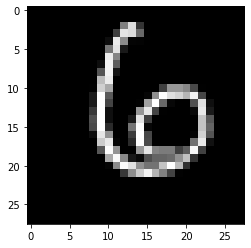

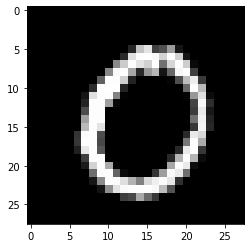

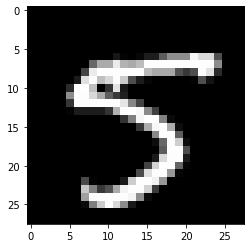

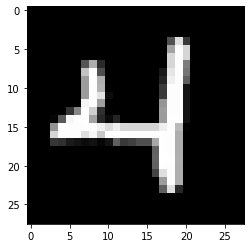

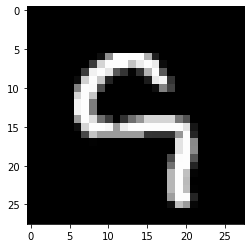

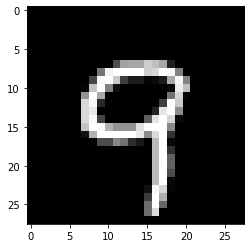

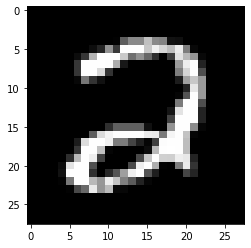

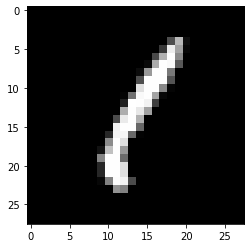

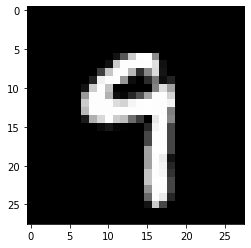

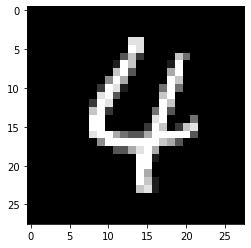

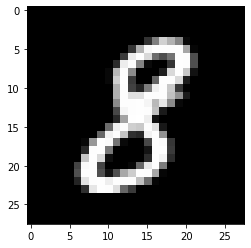

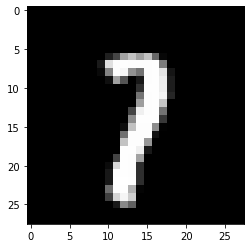

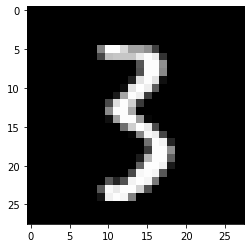

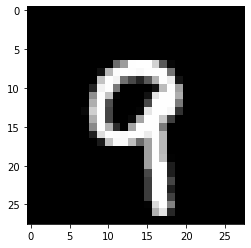

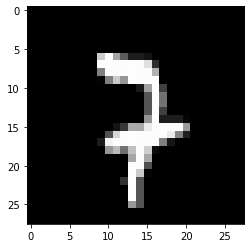

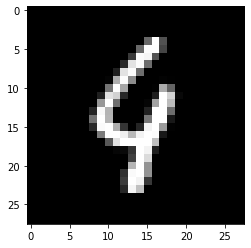

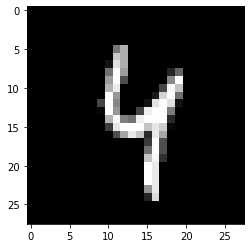

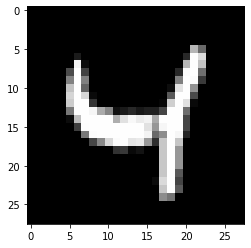

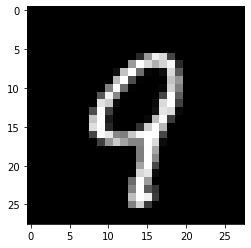

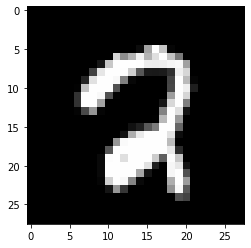

IndexError: index 20 is out of bounds for axis 0 with size 20

In [42]:
first_image = mnist.test.images[100:120]   # 784,784,784,..
fist_image = np.array(first_image, dtype='float')
for i in range(120):
    pixels = first_image[i].reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [ ]:
d

In [ ]:
# 이름 저장해둔것 호출하고있음 

In [ ]:
# 문제: 저장된 모델을 로딩한 다음
# 테스트 데이터 100번부터 20개의 데이터를 예측 하여 출력하고 정확도를 출력하시오 

In [59]:
import tensorflow as tf

tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess, 'data/cnn_model.ckpt')
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name('input:0')
Yi = sess.graph.get_tensor_by_name('output:0')
keep = sess.graph.get_tensor_by_name('keep:0')
accuracy = sess.graph.get_tensor_by_name('accuracy:0')
prediction = sess.graph.get_tensor_by_name('prediction:0')


result = sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256], Yi:mnist.test.labels[:256], keep:1.0})

predict = sess.run(tf.argmax(prediction,1), feed_dict = {X: mnist.test.images[100:150],Y: mnist.test.labels[100:150],keep_prob:1.0})

print(result)
print(predict)
print(len(predict))

C:\Users\ICT01_01\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


OSError: File data/cnn_model.ckpt.meta does not exist.

In [ ]:
### https://www.youtube.com/watch?v=ubKWak6MGm0&list=PLS8gIc2q83OjStGjdTF2LZtc0vefCAbnX&index=38 !!! 독학!!! 

In [ ]:
#    https://doorbw.tistory.com/155

In [ ]:
#  https://emaru.tistory.com/25
# https://lhh3520.tistory.com/376

In [ ]:
#  https://jeinalog.tistory.com/13

In [ ]:
# https://www.youtube.com/watch?v=3QjGtOlIiVI&list=PL1Kb3QTCLIVtyOuMgyVgT-OeW0PYXl3j5